In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy

In [10]:
survey_df = pd.read_csv('data/Survey-Data/Identifier-Similarity-May-2-2023-11.52.csv')

In [11]:
correct_answers = [4, 1, 2, 2, 2, 1, 3, 1, 2, 1, 1, 1]
similarity_type = ['orthographic', 'orthographic', 'orthographic', 'orthographic',
                   'phonological', 'phonological', 'phonological', 'phonological',
                   'semantic', 'semantic', 'semantic', 'semantic']

In [14]:
scored_df = pd.DataFrame()
scored_df['years_experience'] = survey_df['years_experience_1']
scored_df['python_experience'] = survey_df['years_experience_2']
scored_df['course_level'] = survey_df['course_level_1']

Q_df = pd.DataFrame()
Q_df['type'] = similarity_type

dif_percent = []
sim_percent = []
dif_attempts = []
sim_attempts = []

for i in range(12):

    similar_header = 'Q' + str(i + 1) + '_similar'
    different_header = 'Q' + str(i + 1) + '_different'

    dif_data = np.array(survey_df[different_header])
    sim_data = np.array(survey_df[similar_header])

    dif_scored = np.asarray([dif_data[j]==correct_answers[i] if not np.isnan(dif_data[j]) else np.nan for j in range(41)], dtype=float)
    sim_scored = np.asarray([sim_data[j]==correct_answers[i] if not np.isnan(sim_data[j]) else np.nan for j in range(41)], dtype=float)

    scored_df[different_header] = dif_scored
    scored_df[similar_header] = sim_scored

    dif_percent.append(scored_df[different_header].sum()/scored_df[different_header].count())
    sim_percent.append(scored_df[similar_header].sum()/scored_df[similar_header].count())
    dif_attempts.append(scored_df[different_header].count())
    sim_attempts.append(scored_df[similar_header].count())

Q_df['score_different'] = dif_percent
Q_df['n_different'] = dif_attempts
Q_df['score_similar'] = sim_percent
Q_df['n_similar'] = sim_attempts

scored_df.to_csv('data/Survey-Data/scored-survey.csv')

In [15]:
print(Q_df)

            type  score_different  n_different  score_similar  n_similar
0   orthographic         0.500000            8       0.333333          6
1   orthographic         0.666667            9       0.857143          7
2   orthographic         0.625000            8       0.600000          5
3   orthographic         0.500000            6       0.714286          7
4   phonological         0.666667            3       0.555556          9
5   phonological         0.750000           12       0.600000          5
6   phonological         0.666667            9       0.571429          7
7   phonological         0.833333            6       0.800000         10
8       semantic         0.500000            6       0.583333         12
9       semantic         0.800000            5       0.900000         10
10      semantic         0.818182           11       0.750000          4
11      semantic         0.166667           12       0.333333          6


In [16]:
print(Q_df[Q_df['type'] == 'orthographic']['score_different'].mean())

0.5729166666666666


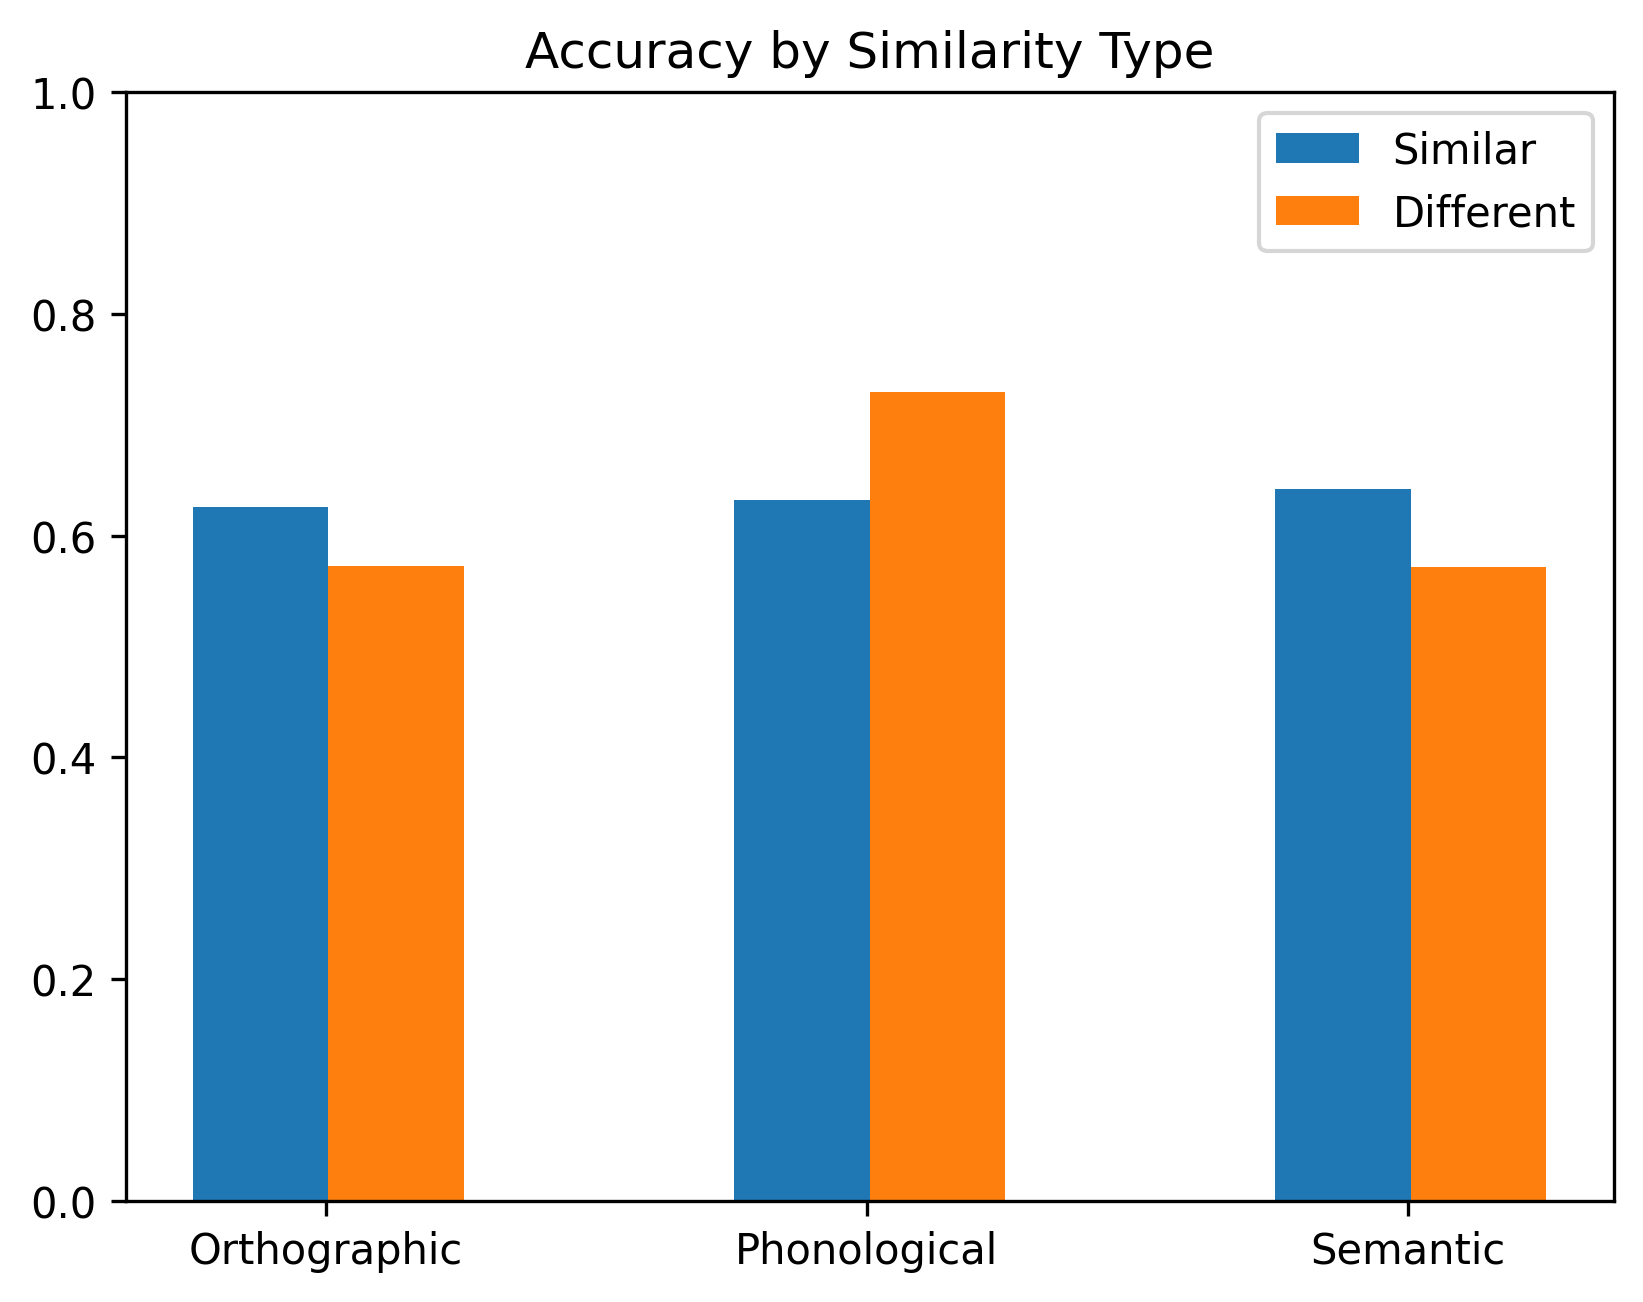

In [17]:
fig, ax = plt.subplots(dpi=300)

count = 0
width = 0.25
x = np.array([0, 1, 2])

means = {'similar': [],
         'different': []}

for version in ('similar', 'different'):
    for sim_type in ('orthographic', 'phonological', 'semantic'):
        score = Q_df[Q_df['type'] == sim_type]['score_' + version].mean()
        means[version].append(score)

for sim_type, data in means.items():
    offset = width*count + 0.13
    ax.bar(x + offset, data, width, label=sim_type.capitalize())\
    
    count += 1

ax.set_xticks(x + width, ('Orthographic', 'Phonological', 'Semantic'))
ax.set_ylim(0, 1)

ax.set_title('Accuracy by Similarity Type')

fig.legend(bbox_to_anchor=(0.9, 0.88))
plt.show()

/tmp/ipykernel_53834/1279232122.py:4: RuntimeWarning: invalid value encountered in double_scalars
  scores.append(scored_df.iloc[r, 3::].sum()/scored_df.iloc[r, 3::].count())


r^2: nan, p: nan


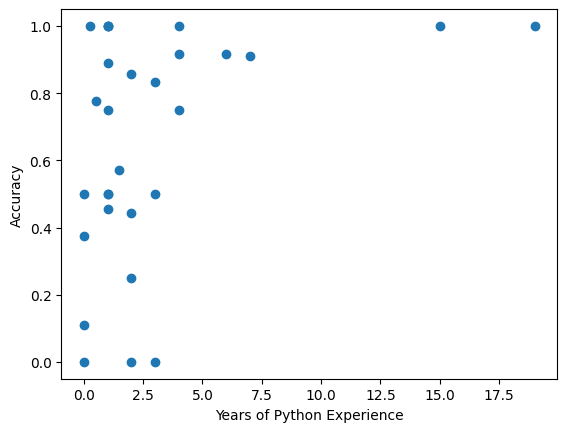

In [19]:
scores = []

for r in range(41):
    scores.append(scored_df.iloc[r, 3::].sum()/scored_df.iloc[r, 3::].count())

fig, ax = plt.subplots()
ax.scatter(scored_df['python_experience'], scores)

lr = scipy.stats.linregress(scored_df['python_experience'], scores)

print(f'r^2: {lr.rvalue}, p: {lr.pvalue}')

ax.set_xlabel('Years of Python Experience')
ax.set_ylabel('Accuracy')

plt.show()

(28, 27) 28
r^2: nan, p: nan


/tmp/ipykernel_53834/2867861670.py:9: RuntimeWarning: invalid value encountered in double_scalars
  no_outlier_scores.append(no_outlier.iloc[r, 3:].sum()/no_outlier.iloc[r, 3:].count())


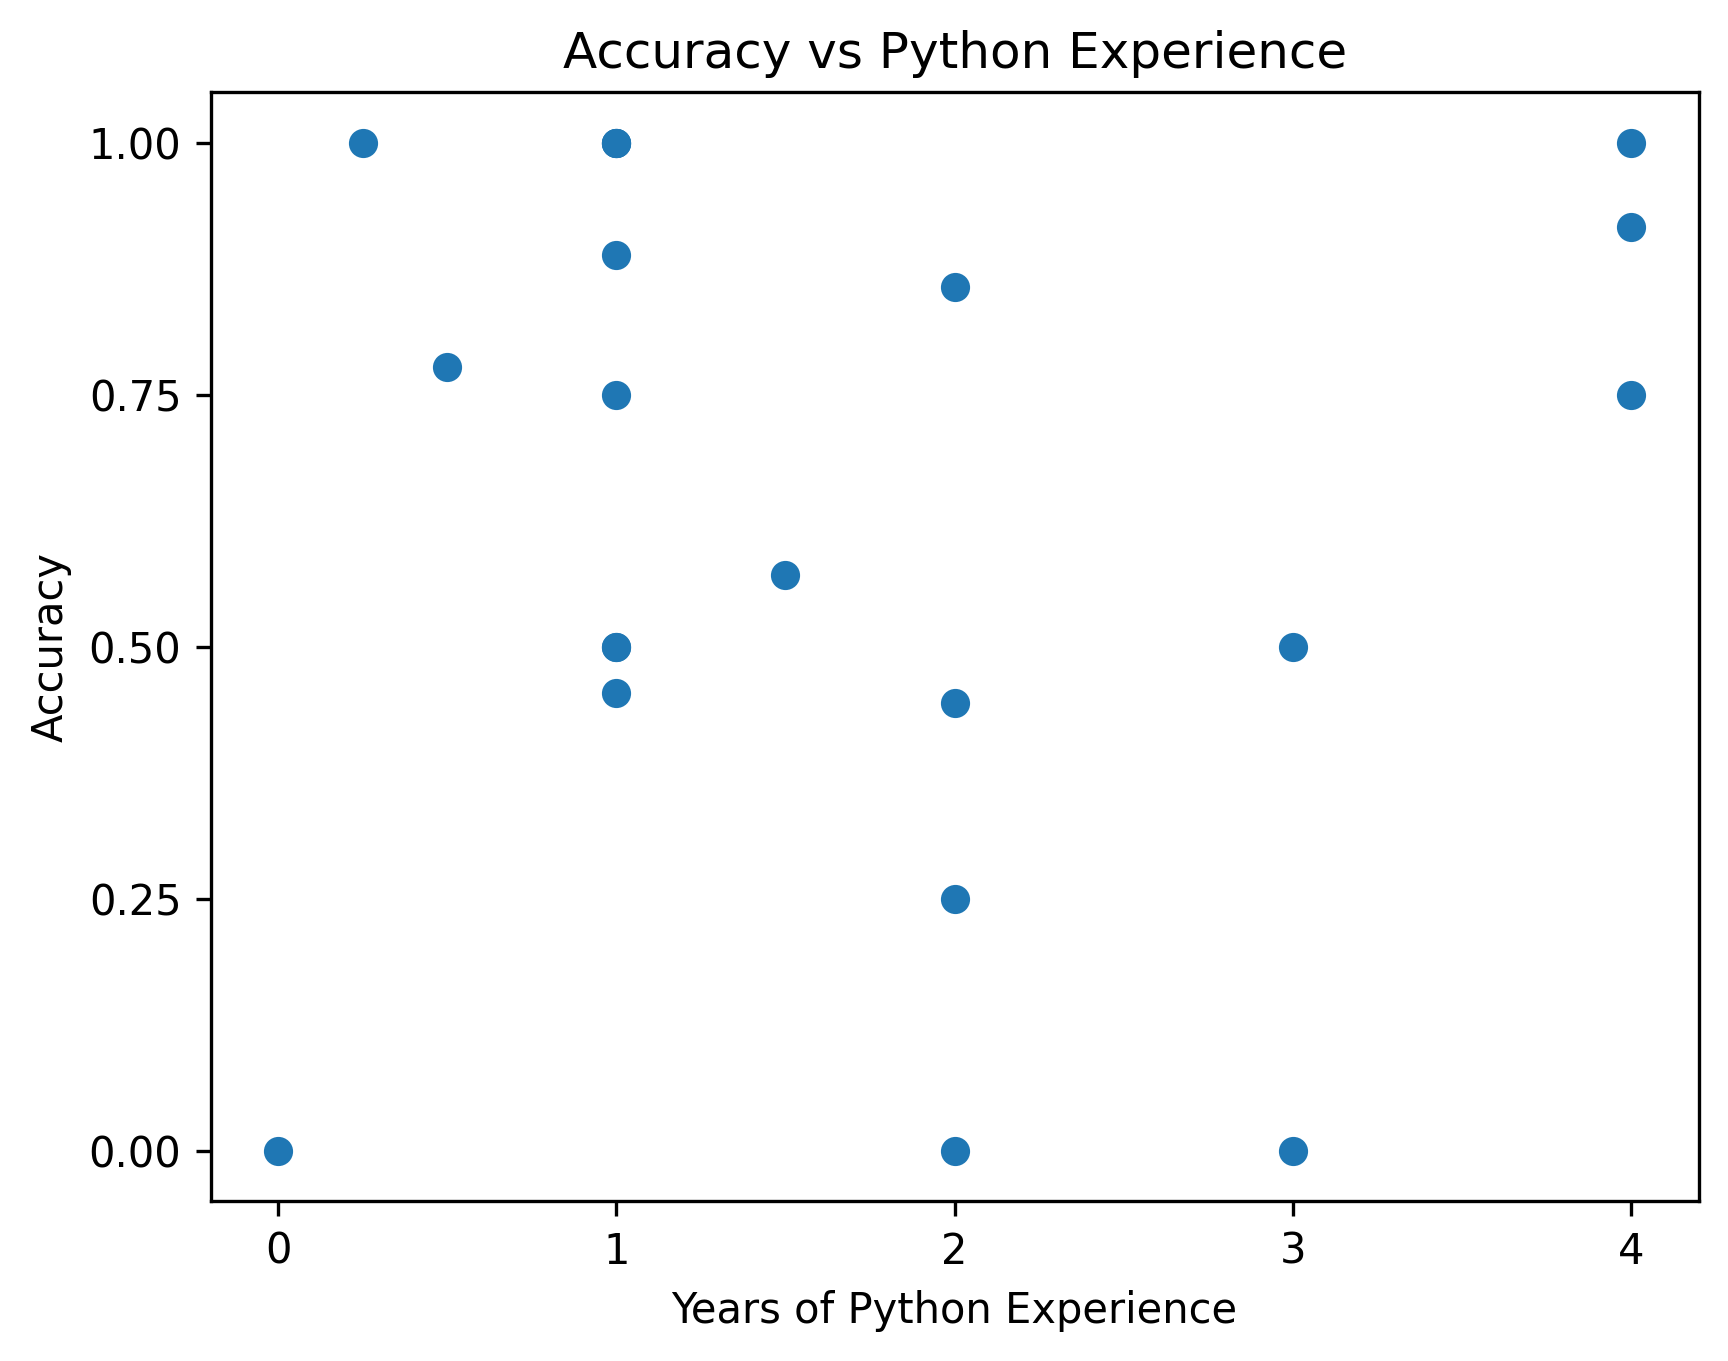

In [20]:
no_outlier = scored_df[scored_df['years_experience'] < 6]
no_outlier = no_outlier[no_outlier['years_experience'] > 0]

print(no_outlier.shape, len(no_outlier))

no_outlier_scores = []

for r in range(len(no_outlier)):
    no_outlier_scores.append(no_outlier.iloc[r, 3:].sum()/no_outlier.iloc[r, 3:].count())


fig, ax = plt.subplots(dpi=300)
ax.scatter(no_outlier['python_experience'], no_outlier_scores)

lr = scipy.stats.linregress(no_outlier['python_experience'], no_outlier_scores)

x = np.linspace(0, 4, 10)
y = lr.slope*x + lr.intercept

plt.plot(x, y)

print(f'r^2: {lr.rvalue}, p: {lr.pvalue}')

ax.set_xlabel('Years of Python Experience')
ax.set_ylabel('Accuracy')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_title('Accuracy vs Python Experience')

plt.show()